## Understand your Customers with SherlockML

Every company wants to understand the demographics of the customers who love them. However, companies often don't know much more about their customers than their postcodes: customers hate wasting time filling surveys. With this in mind,  the `customerintelligence` library was built into Sherlock. Customer Intelligence takes in your customer postcodes (maps them onto census output areas) and finds the demographic features which make the areas your customers live in similar to one another and different to the country as a whole. Under the hood, it uses a novel, unsupervised tree-based algorithm developed by ASI Data Science running on UK census data. In this demonstration, we will show how to use this library to understand your customers. 

In [7]:
import customerintelligence_extras.customerintelligence_extras as cix

from IPython.display import display
from sherlockml import customerintelligence as ci
from sherlockml import opendata
from folium import plugins

%matplotlib inline

## Postcodes

As an example, we will analyse Lidl's customer base. As a proxy for customer postcodes (which is not public data!), we will use the postcodes of their shops in the UK. This is part of Sherlock's `opendata` library. 

In [2]:
lidl = opendata.load('/tutorials/supermarkets/lidl.csv')

As you can see below, the data frame we just loaded is simply a list of postcodes.

In [3]:
lidl.head()

,postcode
0,AB123DB
1,AB156HY
2,AB219LZ
3,AB241XZ
4,AB421RG


The map below shows the location of Lidl's shops in the London area. You can view the location of more shops by zooming in and out of the map.

In [4]:
london = (51.5074, 0.1278)
zoom = 10
postcode_map = cix.postcode_map(lidl["postcode"])
postcode_map.location = london
postcode_map.zoom_start = zoom
postcode_map

## Demographically similar areas

It isn't obvious how to infer information about Lidl's customers from this map! Let's ask `customerintelligence` for some insights.

In [5]:
result = ci.analyse(lidl["postcode"], num_jobs=2)

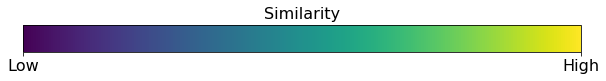

In [9]:
COLORMAP = 'viridis'
sim_map = result.similarity_map(colourmap=COLORMAP, bins=50)
plugins.ScrollZoomToggler().add_to(sim_map)
sim_map.location = london
sim_map.zoom_start = zoom
display(sim_map)
cix.display_colorbar(COLORMAP, title='Similarity')

The people living in areas in blue are less like Lidl's customers, while those living in yellow areas resemble them. Focusing on London, one finds that less affluent boroughs at the edge of the metropolis are demographically similar to Lidl's customers, for example Stratford and Wembley. This is very valuable information, which could allow Lidl to improve their mail advertising campaigns, or find new locations to open shops. In fact, it is very simple to obtain a list of UK postcodes which are most similar to Lidl's customers:

In [10]:
df = result.similarity_score(aggregation='postcodesector',sort=True).head(5)
df

,postcodesector,similarity_score
0,IP11 1,5.818791
1,S70 9,5.782835
2,NP22 9,5.427335
3,DD11 9,5.389341
4,G51 9,5.334939


## Feature importance

Customer Intelligence doesn't only tell you where new customers can be found: it also quantifies how various demographic features distinguish your customers from the rest of the population. In the plot below, each feature is given a score between 0 and 100, which represents how important the feature is in separating your customer base from the general population. Features coloured green tend to be higher within your customers, while features in red tend to be lower. 

In [11]:
metrics_to_analyse = [ 'Fraction_Households_owned_by_tenants', 'Fraction_adult_degree', 'Fraction_white', 'Fraction_UK_born',  'Fraction_adult_population_single','Fraction_married_partnership_widowed',  'Fraction_employed_professional_occupations', 'Fraction_unemployed', 'Fraction_full_time_work']
analysis = cix.analyse_metrics(lidl["postcode"], metrics_to_analyse)

In [12]:
fig = cix.display_analysis(analysis)

In [13]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(True)
init_notebook_mode(connected=True)
iplot(fig, filename='Feature Importance')


The above shows that Lidl shops tend to be located in areas characterised by high levels of people in full time work but also high levels of unemployment. Likewise these tend to be areas of lower than average educational attainment, high numbers of foreign born nationals and low home ownership. This is all interesting, but it is necessary to interpret these results critically in order to disentangle the valuable information from the less valuable. High levels of both full time employment at the same time as unemployment effectively means low levels of part time employment, stay at home spouses and retirees, which points to the fact that most Lidl shops are in urbanised areas. The fact that despite being in urbanised areas, they tend to be in areas in which people are not employed in professional occupations is perhaps a more valuable insight, especially as this runs counter to what one might expect from them being in urban centres and starts to paint a socio-economic picture. Low levels of home ownership and high levels of ethnic diversity could be due to the socio-economic factors or the urban factor.



 ## Your turn!

You can easily test the `customerintelligence` library on your own customer base. First make a copy of this notebook by clicking `File` then `Make a copy...` Simply upload a list of postcodes to analyse as a csv file. After importing the `pandas` module, use `df = pandas.read_csv('your_file')` to load it into a pandas data frame. Then replace `lidl` by `df` in this notebook. Happy analyzing!